# 应用场景

EM聚类,英文名称叫Expectation Maximization.EM算法相当于一个框架,其提供了不同的模型来进行聚类,比如GMM(高斯混合模型)或者HMM(隐马尔科夫模型)进行聚类.  
GMM是通过概率密度来进行聚类,聚成的类符合高斯分布(正态分布).  
HMM用到了马尔科夫过程,在这个过程中,我们通过状态转移矩阵来计算状态转移的概率;HMM在自然语言处理和语音识别领域中有广泛的应用

# 原理概念

在EM这个框架中,E步骤相当于是通过初始化的参数来估计隐含变量.M步骤就是通过隐含变量反推来优化参数.最后通过EM步骤的迭代得到模型参数.

## 最大似然估计

最大似然就是最大可能性的意思,英文名称叫Maximum Likelihood .比如一男一女两个同事比身高,谁更高些?根据经验,相同年龄下男性平均身高比女性高,所以男同事高的可能性会很大.这里运用的就是最大似然的概念.  
最大似乎估计是一种通过已知结果估计参数的方法.它是指一件事情已经发生了,然后反推更有可能是什么因素造成的.比如上面例子中,两个人比身高,一个人比另一个人高,反推他可能是男性.

**EM算法是一种求解最大似然估计的方法,通过观测样本来找出样本的模型参数**

## 模型参数

参数作为模型从历史训练数据中学到的一部分,是机器学习算法的关键.  
统计学中的参数只指用数据估计得到并作用预测模型的一部分,比如正态分布的两个参数分别是平均值和标准差;编程中的参数是用来传递给函数从而得到运行结果.在机器学习中,将参数传递给函数。在这种情况下，参数是一个函数参数，可以有一个取值范围。在机器学习中，您正在使用的具体模型就是函数，需要参数才能对新数据进行预测。  
总之,**模型参数就是模型内部的配置变量,可以用数据估计它的值.**模型参数具有以下特尔正:

- 进行模型预测时需要模型参数；
- 模型参数之可以定义模型功能；
- 模型参数用数据估计或数据学习得到；
- 模型参数一般不由实践者手动设置；
- 模型参数通常作为学习模型的一部分保存。  
通常使用优化算法估计模型参数，优化算法是对参数的可能性进行的一种有效搜索。

通过"每次投掷是哪枚硬币"的案例可以看出,EM算法中E步骤就是通过旧的参数来计算隐藏变量,然后在M步骤中,通过得到的隐藏变量的结果来重新估计参数,知道参数不再发生变化即得到我们想要的结果.

## 比较EM算法与K-Means算法

EM算法最直接的应用就是求参数估计.如果把潜在类别当做隐藏变量,样本看做观察值,那么聚类问题就转化成了参数估计问题.  
相比于K-Means算法,EM聚类更灵活,比如使用K-Means会得到下面的聚类结果

![](./img/EM之两种聚类算法对比.jpg)

你不能说K-Means没有起到分类的效果,但从结果看来明显比较死板.

按照EM算法的GMM模型进行分类,可以得到下面的结果:

![](./img/EM之两种聚类算法对比1.jpg)

K-Means是通过距离来区分样本之间的差别,且每个样本在计算的时候只能属于一个分类,因此称之为硬聚类算法.  
而EM聚类在求解过程,实际上每个样本都有用一定的概率和每个聚类相关,因此称之为软聚类算法.

以上实例对比中,按照GMM模型进行聚类的过程如下:
- (像K-Means一样事先知道聚类的个数但不知道每个样本分别属于哪一类)假设样本符合高斯分布(正态分布)
- 每个高斯分布都属于这个模型的组成部分(component)要分成K个组成部分
- 初始化每个组成部分的高斯分布的参数,看每个样本属于哪个组成部分.以上属于E步骤.
- 通过得到的这些隐含变量结果,反过来求每个组成部分高斯分布的参数,即M步骤
- 反复EM步骤,直到每个组成部分的高斯分布参数不变为止.

>两种聚类算法对比  
相同点:  
1.EM，KMEANS，都是随机生成预期值，然后经过反复调整，获得最佳结果  
2.聚类个数清晰  
不同点:  
1.EM是计算概率，KMeans是计算距离.计算概率，概率只要不为0，都有可能即样本是每一个类别都有可能;计算距离，只有近的的票高，才有可能，即样本只能属于一个类别  

下面通过一个摘叶子的故事,强化对EM聚类过程的认识:
找到最大的叶子  
1.先心里大概有一个叶子大小的概念（初始化模型）  
2.在三分之一的的路程上，观察叶子大小，并修改对大小的评估（观察预期，并修改参数）  
3.在三分之二的路程上，验证自己对叶子大小模型的的评估（重复1,2过程）  
4.在最后的路程上，选择最大的叶子（重复1.2，直到参数不再改变）    

# 工具介绍

Python提供EM算法工具包,有EM算法是一个聚类框架,所以需要明确要用的具体算法,比如采用GMM高斯混合模型,还是HMM隐马尔科夫模型

> from sklearn.mixture import GaussianMixture

使用gmm=GaussianMixure(n_components=1,covariance_type='full',max_iter=100)创建GMM聚类,   
- n_components:即要聚类的个数,默认值为1,也就是说如果不指定n_components,那么最终的聚类结果都会为同一个值
- covariance_type:代表协方差类型.一个高斯混合模型的分布是由均值向量和协方差矩阵决定的.协方差类型有4种取值:一是covariance_type=full,代表完全协方差,也就是元素都不为0;二是covariance_type=tied,代表相同的完全协方差;三是covariance_type=diag,代表对角协方差,也就是对角不为0,其余为0;四是covariance_type=spherical,代表球面协方差,也就是非对角为0,对角完全相同,呈现球面的特性.
- ma_iter:代表最大迭代次数,默认值为100

创建GMM聚类器后使用fit函数传入样本特征矩阵,模型会自动生成聚类器,然后使用prediction=gmm.predict(data)进行聚类,得到结果prediction

拟合训练和预测传入的是相同的特征矩阵.这是因为聚类是无监督学习,不需要事先指定聚类的结果,也无法基于先验的结果经验来学习.只要在训练过程中传入特征值矩阵,机器就会按照特征值矩阵生成聚类器.

# 项目流程

## 问题描述

如何用EM算法对王者荣耀数据进行聚类

## 关键流程

设定项目执行流程如下:
- 首先加载数据源
- 在准备阶段,需要对数据进行探索,包括采用数据可视化技术,以便对英雄属性以及这些属性之间的关系理解得更加深刻;然后对数据质量进行评估,如是否进行数据清洗,最后进行特征选择方便后续进行聚类
- 在聚类阶段,选择适合的聚类模型,并输出聚类结果,对结果进行分析

![](./img/EM之项目流程.jpg)

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

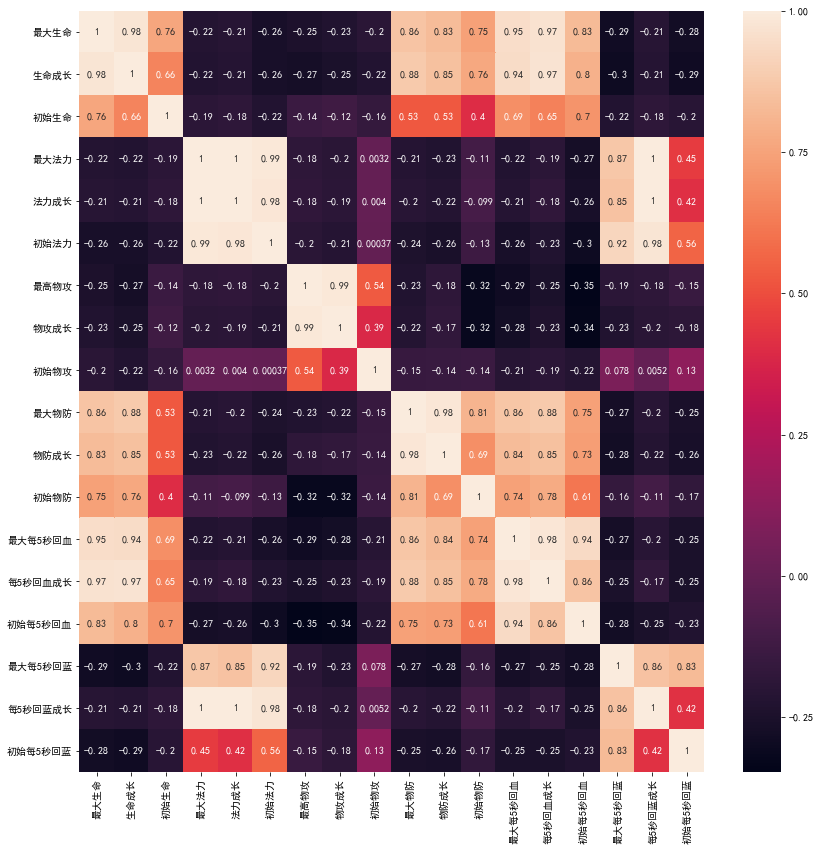

In [2]:
# 数据加载,避免中文乱码问题
data_ori=pd.read_csv('./data/heros.csv',encoding='gb18030')
features = [u'最大生命',u'生命成长',u'初始生命',u'最大法力', u'法力成长',u'初始法力',u'最高物攻',u'物攻成长',u'初始物攻',u'最大物防',u'物防成长',u'初始物防', u'最大每5秒回血', u'每5秒回血成长', u'初始每5秒回血', u'最大每5秒回蓝', u'每5秒回蓝成长', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data=data_ori[features]

# 对英雄属性之间的关系进行可视化分析
# 设置plt正确显示中文
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
# 用热力图呈现features_mean字段之前的相关性
corr=data[features].corr()
plt.figure(figsize=(14,14))
# annot=Ture 显示每个方格的数据
sns.heatmap(corr,annot=True)
plt.show()

将20个英雄属性之间的关系用热力图呈现出来,中间的数字代表两个属性支架你的关系系数,最大值为1,代表完全正相关,关系系数越大代表相关性越大.从图中可以看出'最大生命','生命成长'和'初始生命'这三个属性的相关性大,故只需保留一个属性即可.同理对其他相关性大的属性进行筛选.这样就将原本的20个属性降维到13个属性,并用features_remain进行了保留

In [3]:
# 相关性大的属性保留一个，因此可以对属性进行降维
features_remain = [u'最大生命', u'初始生命', u'最大法力', u'最高物攻', u'初始物攻', u'最大物防', u'初始物防', u'最大每5秒回血', u'最大每5秒回蓝', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features_remain]
data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%'))/100)
data[u'攻击范围']=data[u'攻击范围'].map({'远程':1,'近战':0})
# 采用 Z-Score 规范化数据，保证每个特征维度的数据均值为 0，方差为 1
ss = StandardScaler()
data = ss.fit_transform(data)
# 构造 GMM 聚类
gmm = GaussianMixture(n_components=30, covariance_type='full')
gmm.fit(data)
# 训练数据
prediction = gmm.predict(data)
print(prediction)
# 将分组结果输出到 CSV 文件中
data_ori.insert(0, '分组', prediction)
data_ori.to_csv('./data/hero_out.csv',index=False,sep=',')

[ 1 16 14 25 26 26 23 14  5 16 18 16 25  7 20 18 10  5  2  8 15  3  8  3
  3  3  8 19 28  0  7  0 27 28  0  0 28  6 21 12 27 28 28  0 28 12 16 21
 16 28 22 10  2  4  4  1 10 16 24  2 10 11 17  1 13  9  9 29 19]


D:\YY\Anaconda\envs\analysis\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\YY\Anaconda\envs\analysis\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


'最大攻速'这个属性值时百分数,不适合做距离运算,因此需要将将百分数转化为小数;'攻击范围'这个字段的取值为远程或近战,也不适合矩阵运算,故将取值做个映射,用1代表远程,0代表近战,然后采用Z-Score进行规范化处理.

In [11]:
data_show=pd.read_csv('./data/hero_out.csv',encoding='utf8')
data_show.head()

,分组,英雄,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,...,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝,最大攻速,攻击范围,主要定位,次要定位
0,1,夏侯惇,7350,288.8,3307,1746,94,430,321,11.570,...,98,3.357,51,37,1.571,15,28.00%,近战,坦克,战士
1,16,钟无艳,7000,275.0,3150,1760,95,430,318,11.000,...,92,3.143,48,37,1.571,15,14.00%,近战,战士,坦克
2,14,张飞,8341,329.4,3450,100,0,100,301,10.570,...,115,4.143,57,5,0.000,5,14.00%,近战,坦克,辅助
3,25,牛魔,8476,352.8,3537,1926,104,470,273,8.357,...,117,4.214,58,42,1.786,17,14.00%,近战,坦克,辅助
4,26,吕布,7344,270.0,3564,0,0,0,343,12.360,...,97,3.071,54,0,0.000,0,14.00%,近战,战士,坦克


### 流程总结

聚类的原理就是"物以类聚人以群分".通过聚类算法把特征值相近的归为一类,不同类之间的差异较大.这样就可以对原始数据记性降维,分为几个组(簇).再来研究每个组之间的特性.当然也可以把组(簇)的数量适当提升.

聚类算法也可以作为其他数据挖掘算法的预处理阶段,对数据降维处理.

### 评估聚类结果

聚类和分类不一样,聚类是无监督学习,所以没有实际结果进行比对.这导致聚类的记过评估不像分类准确率一样直观.通常**评估聚类结果采用Calinski-Harabaz指标**

In [13]:
from sklearn.metrics import calinski_harabasz_score
print(calinski_harabasz_score(data, prediction))

21.774379481017153


指标分数越高,代表聚类效果越好,也就是相同类中的差异性小,不同类之间的差异性大.具体聚类的结果含义需要人工来分析,也就是当这些数据被分成不同的类别之后,具体每个类代表的含义.